Observations (image rows)  427
Features (image columns)  640


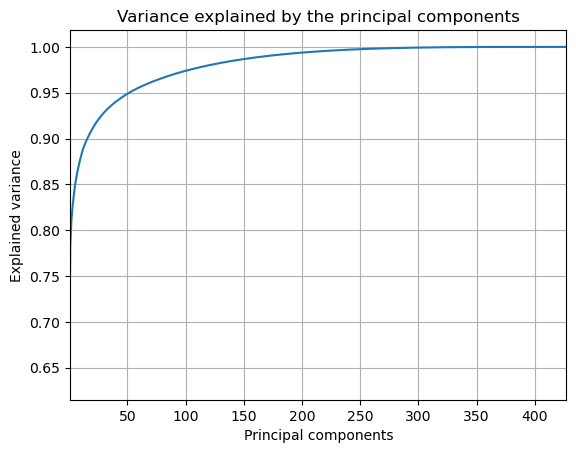

Shape of the reconstructed image (427, 640)


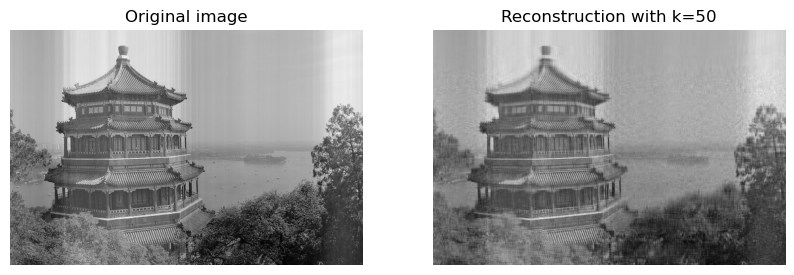

In [54]:
# IMAGE COMPRESSION

# PCA can be applied as a compression technique for images. Here we
# demonstrate how to do this using scikit-learn's PCA implementation.
# We treat each row of the image as an observation and each column as a feature.
# Then we can apply PCA to find the principal components and see how much variance
# is explained by each component.

# Once we have the principal components, we can reconstruct the image using
# a subset of these components, effectively compressing the image.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_sample_images
from PIL import Image

# load a sample image
dataset = load_sample_images()   
img = dataset.images[0] 
# this image is RGB, for simplicity convert it to grayscale
img = 0.2989 * img[:,:,0] + 0.5870 * img[:,:,1] + 0.1140 * img[:,:,2] 
# zero mean 
img = img - np.mean(img, axis=0)
print("Observations (image rows) ", img.shape[0])
print("Features (image columns) ", img.shape[1])

# we can now apply PCA
# note: sklearn PCA implementation centers the data by default, so the previous
# zero-meaning step is not strictly necessary
pca = PCA()
pca.fit(img)
# Explained variance refers to variance across rows of the image, not individual pixels
var = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.title('Variance explained by the principal components')
plt.ylabel('Explained variance')
plt.xlabel('Principal components')
plt.plot(var)
plt.xlim(1, min(img.shape))
plt.grid()
plt.show()

# using the information from the explained variance plot let us try to 
# apply dimensionality reduction and reconstruct the original image 
# The reconstructed image has the same shape of the original, 
# but lies in a k-dimensional subspace defined by the first k principal components
k = 50
pca_red = PCA(n_components=k)
rec_img = pca_red.inverse_transform(pca_red.fit_transform(img))
print("Shape of the reconstructed image", rec_img.shape)

# compare the original image and the reconstructed one
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Original image")
plt.imshow(img, cmap=plt.cm.gray)
plt.axis("off")

plt.subplot(1,2,2)
plt.title(f"Reconstruction with k={k}")
plt.imshow(rec_img, cmap=plt.cm.gray)
plt.axis("off")

plt.show()


Shape of the data set (9298, 256)


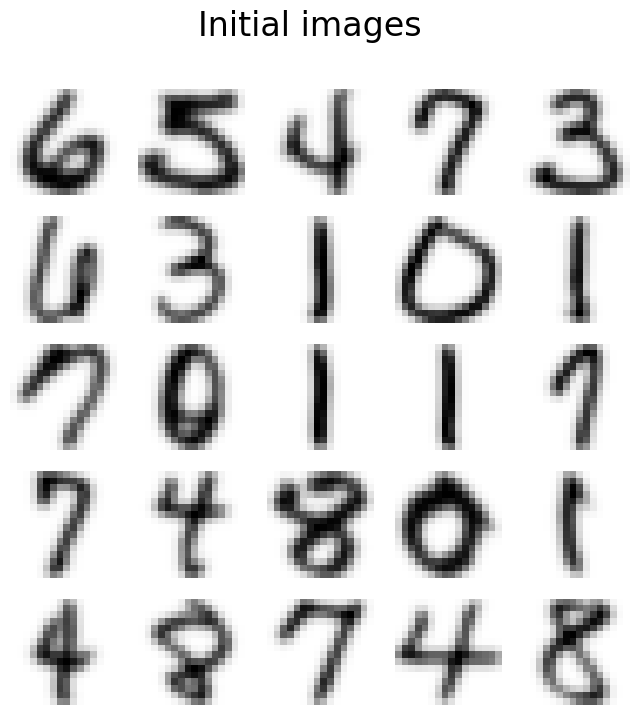

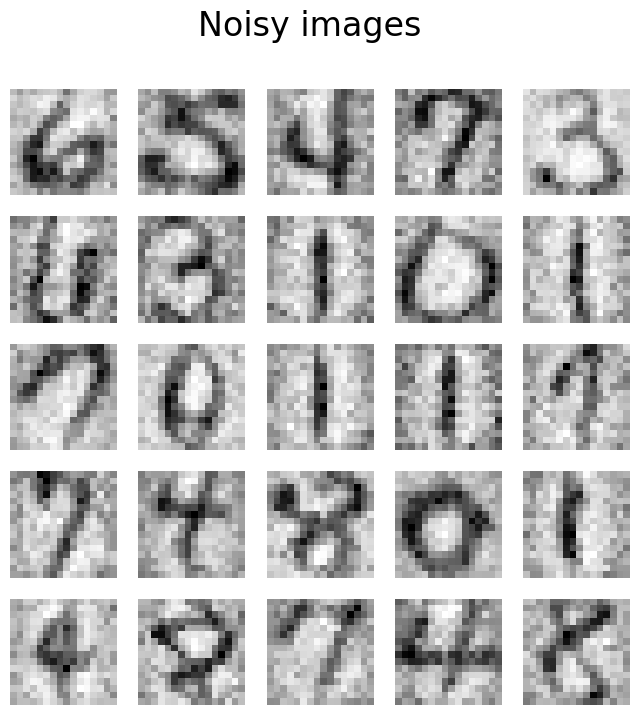

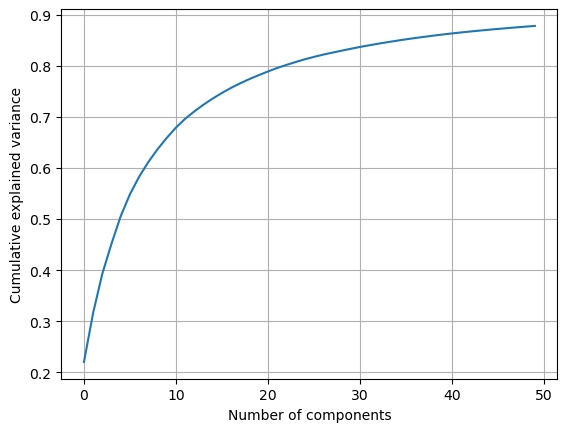

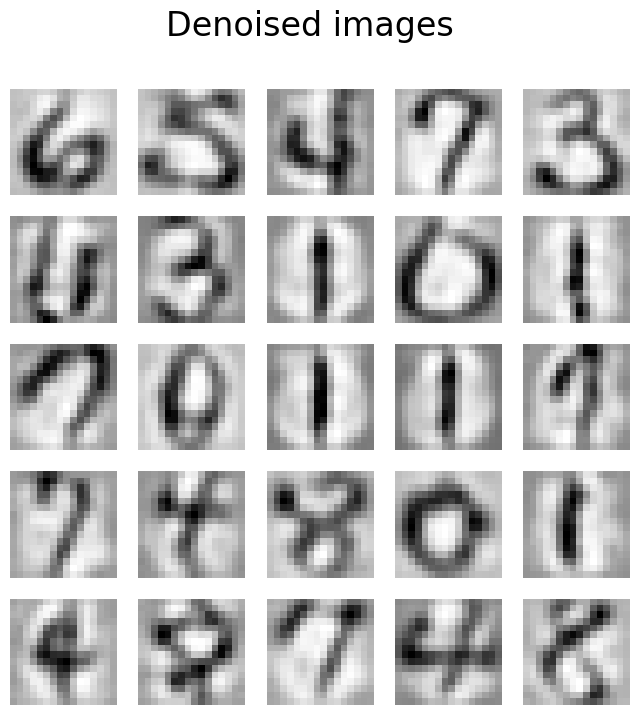

In [66]:
# IMAGE DENOISING

# PCA can also have beneficial data denoising effects. Indeed, by picking only a
# subset of the principal components that explain most of the variance, it is
# possible to neglect less important components, associated which noise, that
# have only tiny variance

# Differently from the previous example, here we use several images for finding
# the PCA transformation

from sklearn.datasets import fetch_openml
digits = fetch_openml(data_id=41082, as_frame=False)
X = digits.data
# note that the height*width*n_imgs data set is flattened (each image is 
# reshaped into a column vector), so that it has a matrix shape for PCA
print("Shape of the data set", X.shape)

# add Gaussian noise to the images
X_noisy = X + 0.2*np.random.randn(X.shape[0], X.shape[1])
# zero mean
X_noisy = X_noisy - np.mean(X_noisy, axis=0)

# initial images vs noisy images
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(8, 8))
for img, ax in zip(X, axs.ravel()):
    ax.imshow(img.reshape((16, 16)), cmap="Greys")
    ax.axis("off")
fig.suptitle("Initial images", fontsize=24)

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(8, 8))
for img, ax in zip(X_noisy, axs.ravel()):
    ax.imshow(img.reshape((16, 16)), cmap="Greys")
    ax.axis("off")
fig.suptitle("Noisy images", fontsize=24)
plt.show()  

# next apply PCA and pick only a subset of the principal components. Get the
# reconstructed image and show the difference
k = 50
pca = PCA(n_components=k)
pca.fit(X_noisy)
X_noisy_rec = pca.inverse_transform(pca.transform(X_noisy))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.grid()
plt.show()

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(8, 8))
for img, ax in zip(X_noisy_rec, axs.ravel()):
    ax.imshow(img.reshape((16, 16)), cmap="Greys")
    ax.axis("off")
fig.suptitle("Denoised images", fontsize=24)
plt.show()

Names of famous "faces" ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
Shape of the data set (1348, 2914)


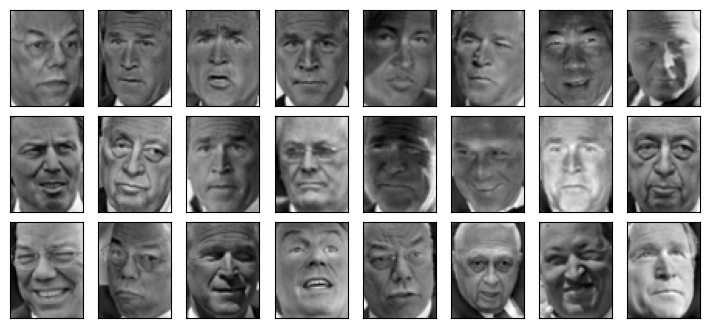

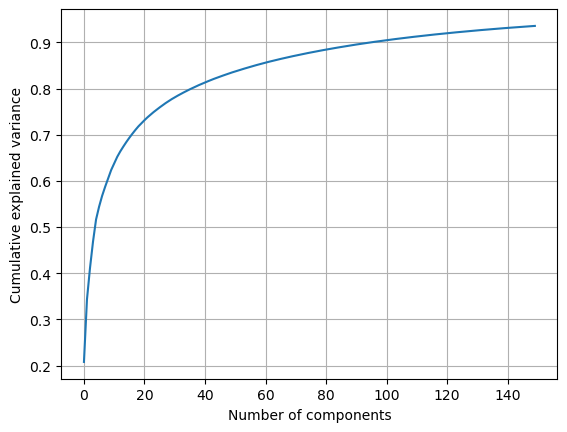

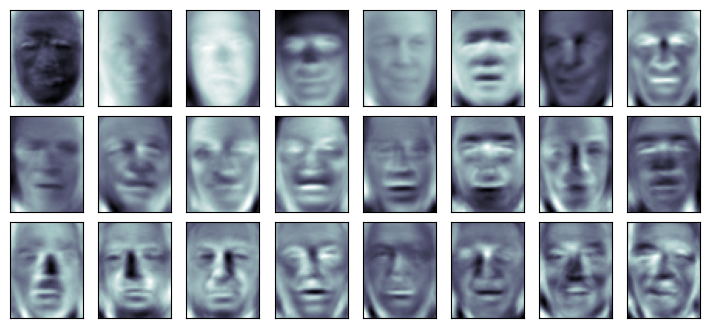

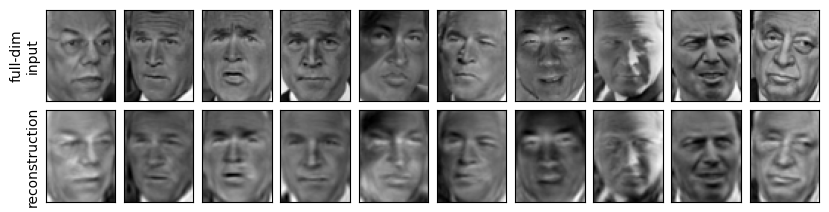

In [ ]:
# Face representation with PCA (Eigenfaces)

# this dataset contains faces of famous people. As in the previous example the 
# data set has the right shape (each image is reshaped into a column vector), so that
# it has a matrix shape for PCA. We will use PCA to reduce the dimensionality

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print("Names of famous \"faces\"", faces.target_names)
print("Shape of the data set", faces.data.shape)
# zero mean
X = faces.data - np.mean(faces.data, axis=0)

# We first show some of the images in the dataset
# Each face image has shape (62, 47)
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(62, 47), cmap='binary_r')
plt.show()  

# let us apply PCA and see how the eigenvectors of the covariance matrix
# look like, the so called "eigenfaces". They represent the basis that can be 
# used to construct the images that gave rise to the covariance matrix used for
# applying PCA. Individual face images can be approximated as linear combinations 
# of these eigenfaces. Eigenfaces were studied in computer vision to devise facial 
# recognition methods. 
pca = PCA(n_components=150)
pca.fit(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.grid()
plt.show()

# pca.components_ are the principal directions (eigenvectors of the covariance matrix)
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i,:].reshape(62, 47), cmap='bone')

# as in the previous case we can look at the reconstructed images
X_rec = pca.inverse_transform(pca.transform(X))
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(X[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(X_rec[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('\nreconstruction')
plt.show()